In [201]:
import pandas as pd
train=pd.read_csv('data/housing/train.csv')
test=pd.read_csv('data/housing/test.csv')
sample=pd.read_csv('data/housing/sample_submission.csv')

In [202]:
from sklearn import linear_model
regr=linear_model.LinearRegression()

In [203]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [204]:
train['OverallQual'].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [205]:
train.corr()[train.corr().SalePrice>.6] #High correlation elements

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000


In [206]:
#normalize these features in the main frame
#normalize: (x-u)/sd

In [207]:
kpi_train=train[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea', 'GarageCars', 'GarageArea']]
kpi_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836


In [208]:
kpi_train.describe()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,1057.429452,1162.626712,1515.463699,1.767123,472.980137
std,1.382997,438.705324,386.587738,525.480383,0.747315,213.804841
min,1.000000,0.000000,334.000000,334.000000,0.000000,0.000000
25%,5.000000,795.750000,882.000000,1129.500000,1.000000,334.500000
50%,6.000000,991.500000,1087.000000,1464.000000,2.000000,480.000000
75%,7.000000,1298.250000,1391.250000,1776.750000,2.000000,576.000000
max,10.000000,6110.000000,4692.000000,5642.000000,4.000000,1418.000000


In [209]:
#squared factors: GrLivArea,OverallQual, GarageArea, TotalBsmtSF
kpi_train['GrLivArea2']=kpi_train['GrLivArea']**2
kpi_train['OverallQual2']=kpi_train['OverallQual']**2
kpi_train['GarageArea2']=kpi_train['GarageArea']**2
kpi_train['TotalBsmtSF2']=kpi_train['TotalBsmtSF']**2

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [210]:
kpi_normal=pd.DataFrame((kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"]-kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"].mean())
                        /kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"].std())

In [252]:
kpi_normal_range=pd.DataFrame((kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"]-kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"].mean())
                        /(kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"].max()-kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"].min()))

In [211]:
kpi_normal.head() #The normalized key values

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,GrLivArea2,OverallQual2,GarageArea2,TotalBsmtSF2
0,0.651256,-0.459145,-0.793162,0.370207,0.311618,0.350880,0.170300,0.564972,0.137825,-0.411933
1,-0.071812,0.466305,0.257052,-0.482347,0.311618,-0.060710,-0.474731,-0.177887,-0.257666,0.201175
2,0.651256,-0.313261,-0.627611,0.514836,0.311618,0.631510,0.299018,0.564972,0.447070,-0.330891
3,0.651256,-0.687089,-0.521555,0.383528,1.649742,0.790533,0.181922,0.564972,0.636559,-0.526867
4,1.374324,0.199611,-0.045596,1.298881,1.649742,1.697903,1.094207,1.422117,1.914968,0.000383


In [212]:
kpi_normal_price=pd.concat([kpi_normal,train['SalePrice']],axis=1) #Add in sale prices

kpi_normal_price.head()

In [258]:
kpi_normal_range.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,GrLivArea2,OverallQual2,GarageArea2,TotalBsmtSF2
0,0.100076,-0.032967,-0.070360,0.036650,0.058219,0.052905,0.011082,0.099869,0.015374,-0.015476
1,-0.011035,0.033481,0.022802,-0.047751,0.058219,-0.009154,-0.030892,-0.031445,-0.028742,0.007558
2,0.100076,-0.022493,-0.055674,0.050968,0.058219,0.095219,0.019458,0.099869,0.049869,-0.012431
3,0.100076,-0.049334,-0.046266,0.037968,0.308219,0.119196,0.011838,0.099869,0.071006,-0.019794
4,0.211187,0.014332,-0.004045,0.128586,0.308219,0.256008,0.071204,0.251384,0.213607,0.000014


In [266]:
#x_train=kpi_normal.drop(['OverallQual', 'TotalBsmtSF','1stFlrSF','GrLivArea','GarageCars','GarageArea'],axis=1)
#x_train=kpi_normal.drop(['OverallQual'],axis=1)
x_train=kpi_normal #.drop('TotalBsmtSF',axis=1)
y_train=train['SalePrice']

regr.fit(x_train,y_train)

regr.score(x_train,y_train)

0.81382401680349314

In [262]:
regr.coef_

array([-59356.22619447,  33113.60766296,   5921.32603621,  13498.81382174,
         9857.91820727,   -966.58190482,  11103.02883481,  95187.39094208,
         3998.97872058, -31373.23301165])

In [260]:
regr.coef_

array([-386267.07854684,  461184.60738982,   66751.05371051,
        136354.66903455,   52764.45982692,   -6410.58047007,
        170622.73989196,  538490.11330652,   35850.50926516,
       -835077.2927139 ])

In [218]:
kpi_test=test[['OverallQual','TotalBsmtSF','1stFlrSF','GrLivArea', 'GarageCars', 'GarageArea']]

In [219]:
kpi_test[kpi_test.isnull().any(axis=1)]

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
660,4,NaN,896,896,1.0,280.0
1116,5,859.0,942,1828,NaN,NaN


In [220]:
kpi_test[['TotalBsmtSF','GarageCars','GarageArea']]=kpi_test[['TotalBsmtSF','GarageCars','GarageArea']].fillna(0) #If no garage,basement NA

//anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [221]:
#squared factors: GrLivArea,OverallQual, GarageArea, TotalBsmtSF
kpi_test['GrLivArea2']=kpi_test['GrLivArea']**2
kpi_test['OverallQual2']=kpi_test['OverallQual']**2
kpi_test['GarageArea2']=kpi_test['GarageArea']**2
kpi_test['TotalBsmtSF2']=kpi_test['TotalBsmtSF']**2



//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [222]:
kpi_test.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,GrLivArea2,OverallQual2,GarageArea2,TotalBsmtSF2
0,5,882.0,896,896,1.0,730.0,802816,25,532900.0,777924.0
1,6,1329.0,1329,1329,1.0,312.0,1766241,36,97344.0,1766241.0
2,5,928.0,928,1629,2.0,482.0,2653641,25,232324.0,861184.0
3,6,926.0,926,1604,2.0,470.0,2572816,36,220900.0,857476.0
4,8,1280.0,1280,1280,2.0,506.0,1638400,64,256036.0,1638400.0


In [223]:
kpi_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,GrLivArea2,OverallQual2,GarageArea2,TotalBsmtSF2
0,7,856,856,1710,2,548,2924100,49,300304,732736
1,6,1262,1262,1262,2,460,1592644,36,211600,1592644
2,7,920,920,1786,2,608,3189796,49,369664,846400
3,7,756,961,1717,3,642,2948089,49,412164,571536
4,8,1145,1145,2198,3,836,4831204,64,698896,1311025


In [224]:
kpi_test_squared_normal=pd.DataFrame((kpi_test.loc[:,"OverallQual":"TotalBsmtSF2"]-kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"].mean())
                        /kpi_train.loc[:,"OverallQual":"TotalBsmtSF2"].std()) #Normalize test data with same vals

In [199]:
kpi_test_normal=pd.DataFrame((kpi_test.loc[:,"OverallQual":"GarageArea"]-kpi_train.loc[:,"OverallQual":"GarageArea"].mean())
                        /kpi_train.loc[:,"OverallQual":"GarageArea"].std()) #Normalize test data with same vals

In [123]:
kpi_normal.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,0.651256,-0.459145,-0.793162,0.370207,0.311618,0.350880
1,-0.071812,0.466305,0.257052,-0.482347,0.311618,-0.060710
2,0.651256,-0.313261,-0.627611,0.514836,0.311618,0.631510
3,0.651256,-0.687089,-0.521555,0.383528,1.649742,0.790533
4,1.374324,0.199611,-0.045596,1.298881,1.649742,1.697903


In [124]:
kpi_test_normal.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,-0.794879,-0.399880,-0.689693,-1.178852,-1.026506,1.202124
1,-0.071812,0.619027,0.430364,-0.354844,-1.026506,-0.752930
2,-0.794879,-0.295026,-0.606917,0.216062,0.311618,0.042187
3,-0.071812,-0.299585,-0.612091,0.168486,0.311618,-0.013939
4,1.374324,0.507335,0.303614,-0.448092,0.311618,0.154439


In [140]:
%matplotlib inline


## Trying to study relationships of data

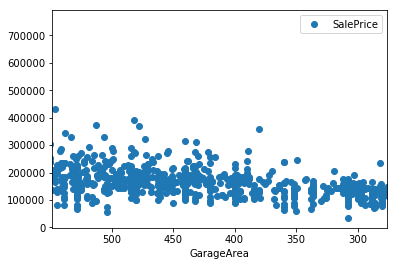

In [149]:
train.plot(x='GarageArea',y='SalePrice',style='o')

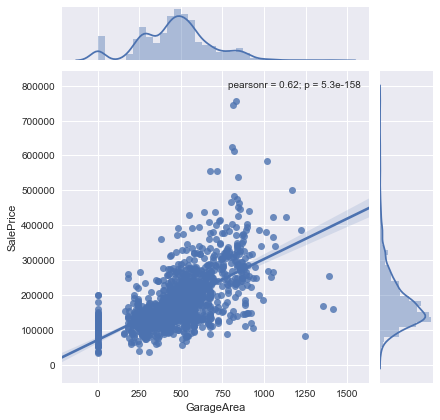

In [167]:
import seaborn as sns
sns.jointplot(x='GarageArea',y='SalePrice',data=train, kind='reg')

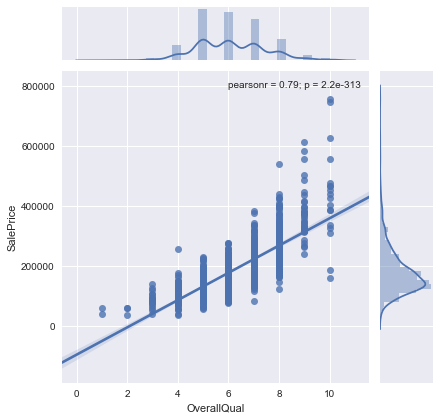

In [168]:
sns.jointplot(x='OverallQual',y='SalePrice',data=train, kind='reg')

In [ ]:
OverallQual	TotalBsmtSF	1stFlrSF	GrLivArea	GarageCars	GarageArea

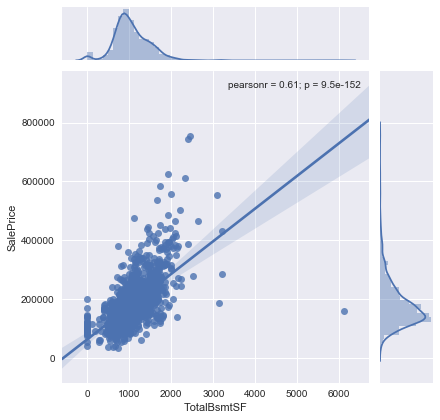

In [172]:
sns.jointplot(x='TotalBsmtSF',y='SalePrice',data=train, kind='reg')

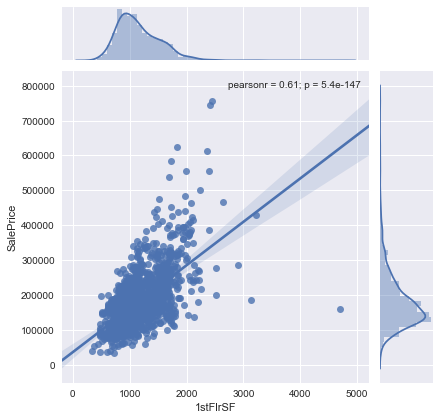

In [171]:
sns.jointplot(x='1stFlrSF',y='SalePrice',data=train, kind='reg')

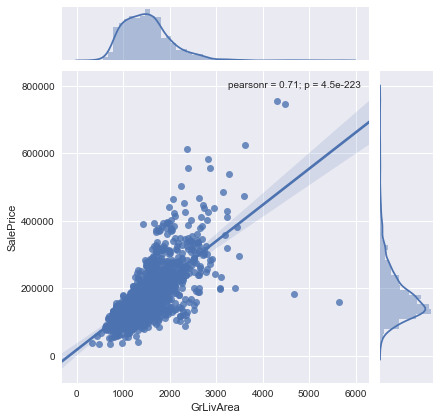

In [170]:
sns.jointplot(x='GrLivArea',y='SalePrice',data=train, kind='reg')

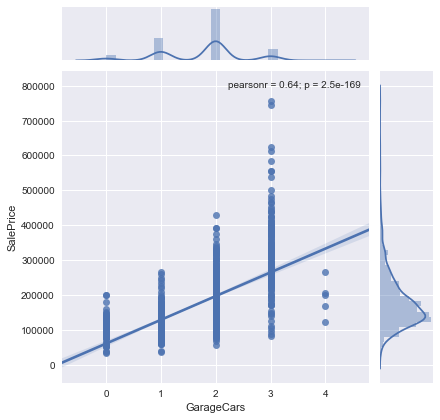

In [169]:
sns.jointplot(x='GarageCars',y='SalePrice',data=train, kind='reg')

In [226]:
regr.coef_

array([-59356.22619447,  33113.60766296,   5921.32603621,  13498.81382174,
         9857.91820727,   -966.58190482,  11103.02883481,  95187.39094208,
         3998.97872058, -31373.23301165])

In [225]:
kpi_test[kpi_test.isnull().any(axis=1)]

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,GrLivArea2,OverallQual2,GarageArea2,TotalBsmtSF2


In [227]:
predicted_prices=regr.predict(kpi_test_squared_normal)
predicted_prices_df=pd.DataFrame(predicted_prices)

In [228]:
predicted_prices_df[predicted_prices_df.any(axis=1)<0]

,0


In [229]:
predicted_prices_df=pd.DataFrame(predicted_prices) 
submission_df=pd.concat([test['Id'],predicted_prices_df],axis=1)
submission_df.columns=['Id','SalePrice']
submission_df.head()

,Id,SalePrice
0,1461,113909.499648
1,1462,159516.762612
2,1463,153747.556847
3,1464,169336.176621
4,1465,237587.572135


In [230]:
submission_df[submission_df.SalePrice<0]

,Id,SalePrice


In [231]:
submission_df.to_csv('linear-submission-allKPI-3.csv',index=False)

In [114]:
submission_df['SalePrice']=submission_df['SalePrice'].astype(int)

In [129]:
submission_df.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,178758.744163
std,421.321334,69576.979362
min,1461.000000,-18813.013929
25%,1825.500000,129548.854689
50%,2190.000000,170530.182369
75%,2554.500000,219476.002656
max,2919.000000,599915.549463


In [118]:
train[['Id','SalePrice']].describe()

,Id,SalePrice
count,1460.000000,1460.000000
mean,730.500000,180921.195890
std,421.610009,79442.502883
min,1.000000,34900.000000
25%,365.750000,129975.000000
50%,730.500000,163000.000000
75%,1095.250000,214000.000000
max,1460.000000,755000.000000
